In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.stats.power import TTestIndPower

In [40]:
import clean_payroll 

In [41]:
df = pd.read_csv('data/payroll_data.csv')

In [42]:
clean_data = clean_payroll.clean_payroll_data(df)

In [5]:
clean_data.head()

,row_id,year,department_title,payroll_department,record_number,job_title,employment_type,hourly_or_event_rate,annual_sal,q1_payments,...,mou_title,fms_department,job_class,pay_grade,average_health_cost,average_dental_cost,average_basic_life,average_benefit_cost,benefits_plan,job_class_link
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,52450.56,11331.00,...,police officers unit,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,89303.76,20036.32,...,police officers unit,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,60028.96,15793.88,...,supv blue collar,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,64553.13,14700.00,...,clerical unit,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,59695,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,$22.95,47911.51,13493.87,...,service employees unit,4,3156,A,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/3156.pdf


In [9]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231463 entries, 1 to 274160
Data columns (total 35 columns):
row_id                        231463 non-null int64
year                          231463 non-null int64
department_title              231463 non-null object
payroll_department            231463 non-null float64
record_number                 231463 non-null object
job_title                     231463 non-null object
employment_type               231463 non-null object
hourly_or_event_rate          231463 non-null object
annual_sal                    231463 non-null float64
q1_payments                   231463 non-null object
q2_payments                   231463 non-null object
q3_payments                   231463 non-null object
q4_payments                   231463 non-null object
payments_over_base_pay        231463 non-null object
_over_base_pay                231463 non-null object
total_payments                231463 non-null object
base_pay                      231463 non-

In [43]:
clean_data['annual_sal'] = pd.to_numeric(clean_data['annual_sal'])

C:\Users\Rocio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
clean_data.year.unique()

array([2013, 2014, 2016, 2015], dtype=int64)

In [47]:
sal_mayor = clean_data.loc[clean_data.department_title == "Mayor"]

In [48]:
sal_zoo = clean_data.loc[clean_data.department_title == "Zoo"]

In [49]:
sal_mayor

,row_id,year,department_title,payroll_department,record_number,job_title,employment_type,hourly_or_event_rate,annual_sal,q1_payments,...,mou_title,fms_department,job_class,pay_grade,average_health_cost,average_dental_cost,average_basic_life,average_benefit_cost,benefits_plan,job_class_link
776,74029,2014,Mayor,3651.0,2540069426,Mayoral Aide VIII,Full Time,$57.02,119057.76,23134.20,...,non-represented,46,148,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/0148.pdf
991,17809,2013,Mayor,3651.0,1529612166,Mayoral Aide VI,Full Time,$40.03,83585.51,16476.50,...,non-represented,46,146,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/0146.pdf
1110,17989,2013,Mayor,3651.0,3215148320,Mayoral Aide I,Full Time,$23.97,50052.75,0.00,...,non-represented,46,141,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/0141.pdf
1935,74138,2014,Mayor,3651.0,3813744436,Mayoral Aide I,Full Time,$20.38,42553.44,8562.24,...,non-represented,46,141,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/0141.pdf
2016,17879,2013,Mayor,3654.0,387961953,Mayoral Aide VII,Full Time,$53.35,111397.67,21918.73,...,non-represented,46,147,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/0147.pdf
2213,74072,2014,Mayor,3652.0,54819265,Mayoral Aide V,Full Time,$33.92,70824.96,15159.60,...,non-represented,46,145,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/0145.pdf
2272,74027,2014,Mayor,3651.0,1156919922,Mayoral Aide VII,Full Time,$54.20,113169.60,25315.98,...,non-represented,46,147,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/0147.pdf
2295,74074,2014,Mayor,3652.0,1489021806,Mayoral Aide VII,Full Time,$46.05,96152.40,21513.36,...,non-represented,46,147,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/0147.pdf
2517,17957,2013,Mayor,3654.0,829984803,Mayoral Aide I,Full Time,$19.54,40799.52,9328.16,...,non-represented,46,141,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/0141.pdf
3014,74073,2014,Mayor,3652.0,2849295094,Mayoral Aide V,Full Time,$35.81,74771.28,14367.60,...,non-represented,46,145,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/0145.pdf


In [17]:
sal_zoo.annual_sal.mean()

54948.97707683737

In [18]:
sal_mayor.annual_sal.mean()

82016.06385947055

In [50]:
mayor_sample = np.random.choice(sal_mayor.annual_sal, size=30)

In [51]:
zoo_sample = np.random.choice(sal_zoo.annual_sal, size=30)

In [52]:
mayor_sample

array([155305.44,  59403.6 ,  68924.88,  61053.12, 113169.6 ,  57085.92,
        76817.52,  70824.96,  91078.56,  55561.68, 104310.22, 161548.56,
        78947.28,  65291.76,  64331.28,  55561.68,  88238.88,  61825.68,
       161548.56,  42553.44,  65291.76,  62723.52,  62723.52,  58651.92,
        54058.32,  87937.43,  76817.52,  60176.16, 110124.51,  60322.32])

In [53]:
stats.ttest_ind(mayor_sample,zoo_sample)

Ttest_indResult(statistic=3.3221169061479974, pvalue=0.0015504556841803264)

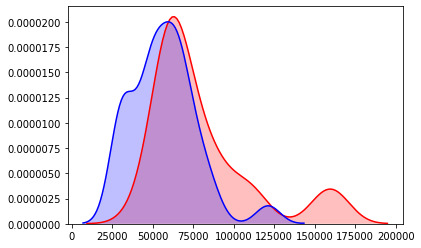

In [55]:
sns.kdeplot(mayor_sample, color = 'red', shade = True)
sns.kdeplot(zoo_sample, color = 'blue', shade = True)

In [86]:
zoo_sample.mean()

56805.937

In [87]:
zoo_sample.std()

19995.194430189993

In [89]:
mayor_sample.std()

31341.684798788447

In [67]:
mayor_mean = mayor_sample.mean()
zoo_mean = zoo_sample.mean()

In [83]:
# pooled variance
pooled_var = (((30-1)*np.var(mayor_sample)+(30-1)*np.var(zoo_sample))/(60-2))
pooled_var

691054503.1638539

In [85]:
effect_sizes = (mayor_mean + zoo_mean) / pooled_var
effect_sizes

0.00019759115435157492

In [91]:
(mayor_mean-zoo_mean)/(np.sqrt(pooled_var))

0.8724306409785425

In [92]:
(effect_sizes)*((30/2)**.5)

0.0007652672501615488

In [94]:
data_2014 = clean_data.loc[clean_data.year == 2014]

In [95]:
data_2015 = clean_data.loc[clean_data.year == 2015]

In [96]:
data_2015.head()

,row_id,year,department_title,payroll_department,record_number,job_title,employment_type,hourly_or_event_rate,annual_sal,q1_payments,...,mou_title,fms_department,job_class,pay_grade,average_health_cost,average_dental_cost,average_basic_life,average_benefit_cost,benefits_plan,job_class_link
32,114364,2015,Aging,302.0,743477525,Administrative Clerk,Part Time,$18.61,38857.68,5260.80,...,clerical,2,1358,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/1358.pdf
33,114365,2015,Aging,302.0,1581946655,Administrative Clerk,Part Time,$18.61,38857.68,0.00,...,clerical,2,1358,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/1358.pdf
34,114366,2015,Aging,302.0,1830305085,Program Aide - Aging,Part Time,$16.80,35078.40,0.00,...,administrative,2,1534,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/1534.pdf
35,114367,2015,Aging,302.0,2399465256,Program Aide - Aging,Part Time,$16.80,35078.40,0.00,...,administrative,2,1534,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/1534.pdf
44,114368,2015,Aging,302.0,4189935327,Program Aide - Aging,Part Time,$16.80,35078.40,0.00,...,administrative,2,1534,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/1534.pdf


In [97]:
fifteen_sample = np.random.choice(data_2015.annual_sal, size=30)
fourteen_sample = np.random.choice(data_2014.annual_sal, size=30)

In [98]:
stats.ttest_ind(fifteen_sample,fourteen_sample)

Ttest_indResult(statistic=1.0947690277049835, pvalue=0.27814338854138126)

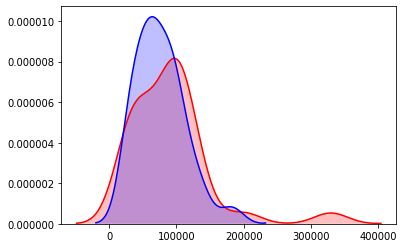

In [99]:
sns.kdeplot(fifteen_sample, color = 'red', shade = True)
sns.kdeplot(fourteen_sample, color = 'blue', shade = True)

In [100]:
data_2016 = clean_data.loc[clean_data.year == 2016]

In [101]:
sixteen_sample = np.random.choice(data_2016.annual_sal, size=30)

In [113]:
stats.ttest_ind(fifteen_sample,thirteen_sample)

Ttest_indResult(statistic=1.2572524037933044, pvalue=0.2137014241484996)

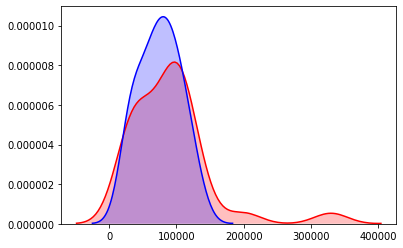

In [114]:
sns.kdeplot(fifteen_sample, color = 'red', shade = True)
sns.kdeplot(thirteen_sample, color = 'blue', shade = True)

In [106]:
data_2013 = clean_data.loc[clean_data.year == 2013]
thirteen_sample = np.random.choice(data_2013.annual_sal, size=30)

In [112]:
stats.ttest_ind(thirteen_sample,sixteen_sample)

Ttest_indResult(statistic=-0.1660129134677459, pvalue=0.868724140918186)

In [115]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231463 entries, 1 to 274160
Data columns (total 35 columns):
row_id                        231463 non-null int64
year                          231463 non-null int64
department_title              231463 non-null object
payroll_department            231463 non-null float64
record_number                 231463 non-null object
job_title                     231463 non-null object
employment_type               231463 non-null object
hourly_or_event_rate          231463 non-null object
annual_sal                    231463 non-null float64
q1_payments                   231463 non-null object
q2_payments                   231463 non-null object
q3_payments                   231463 non-null object
q4_payments                   231463 non-null object
payments_over_base_pay        231463 non-null object
_over_base_pay                231463 non-null object
total_payments                231463 non-null object
base_pay                      231463 non-

In [116]:
clean_data.department_title.unique()

array(['Police (LAPD)', 'Harbor (Port of LA)',
       'Public Works - Sanitation', 'Airports (LAWA)', 'General Services',
       'Recreation And Parks', 'Fire (LAFD)', 'Controller',
       'Transportation (LADOT)', 'Aging', 'City Attorney',
       'Building and Safety', 'Library', 'Personnel',
       'Public Works - Contract Administration',
       'City Planning And Development (DCP)',
       'Housing And Community Investment Department', 'Animal Services',
       'Emergency Management', 'Public Works - Street Services',
       'Public Works - Engineering',
       'Office of the Chief Legislative Analyst (CLA)',
       'Information Technology Agency', 'Council District 12 (CD 12)',
       'City Planning', 'Zoo', 'Office of Finance',
       'City Employees Retirement System (LACERS)',
       'City Administrative Officer (CAO)', 'City Clerk',
       'Council District 13 (CD 13)', 'Council District 05 (CD 5)',
       'Economic And Workforce Development Department (EWDD)',
       'Pension

In [117]:
sal_ca = clean_data.loc[clean_data.department_title == 'Public Works - Contract Administration']
sal_en = clean_data.loc[clean_data.department_title == 'Public Works - Engineering']

In [124]:
ca_15_sample = np.random.choice(sal_ca.loc[sal_ca.year==2015].annual_sal, size=30)
en_15_sample = np.random.choice(sal_en.loc[sal_en.year==2015].annual_sal, size=30)

In [125]:
stats.ttest_ind(ca_15_sample,en_15_sample)

Ttest_indResult(statistic=-0.7954184716642543, pvalue=0.42961339055831116)

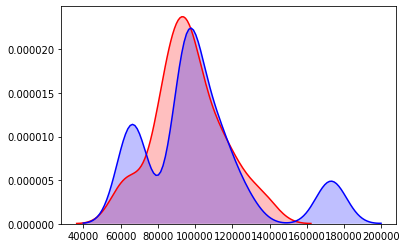

In [126]:
sns.kdeplot(ca_15_sample, color = 'red', shade = True)
sns.kdeplot(en_15_sample, color = 'blue', shade = True)

In [127]:
ca_14_sample = np.random.choice(sal_ca.loc[sal_ca.year==2014].annual_sal, size=30)
en_14_sample = np.random.choice(sal_en.loc[sal_en.year==2014].annual_sal, size=30)

In [128]:
stats.ttest_ind(ca_14_sample,en_14_sample)

Ttest_indResult(statistic=-1.7083788900018149, pvalue=0.09291324789974027)

In [129]:
ca_13_sample = np.random.choice(sal_ca.loc[sal_ca.year==2013].annual_sal, size=30)
en_13_sample = np.random.choice(sal_en.loc[sal_en.year==2013].annual_sal, size=30)

In [130]:
stats.ttest_ind(ca_13_sample,en_13_sample)

Ttest_indResult(statistic=1.3755910329682859, pvalue=0.17423774498632208)

In [132]:
ca_16_sample = np.random.choice(sal_ca.loc[sal_ca.year==2016].annual_sal, size=30)
en_16_sample = np.random.choice(sal_en.loc[sal_en.year==2016].annual_sal, size=30)

In [137]:
stats.ttest_ind(ca_13_sample,ca_14_sample)

Ttest_indResult(statistic=2.491498671878811, pvalue=0.015602398467164913)

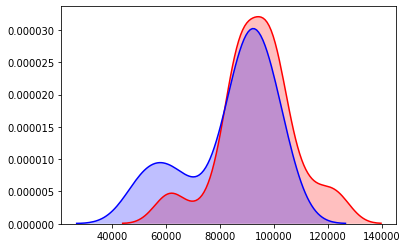

In [138]:
sns.kdeplot(ca_13_sample, color = 'red', shade = True)
sns.kdeplot(ca_14_sample, color = 'blue', shade = True)

In [139]:
ca_13_mean = ca_13_sample.mean()
ca_14_mean = ca_14_sample.mean()
pooled_var = (((30-1)*np.var(ca_13_sample)+(30-1)*np.var(ca_14_sample))/(60-2))
effect_sizes = (ca_13_mean + ca_14_mean) / pooled_var
cohen_d = (ca_13_mean-ca_14_mean)/(np.sqrt(pooled_var))
print(ca_13_mean)
print(ca_14_mean)
print(pooled_var)
print(effect_sizes)
print(cohen_d)

93759.046
84043.34666666665
220493004.41031647
0.0008063856408604843
0.654299606158286


In [140]:
(effect_sizes)*((30/2)**.5)

0.003123118157673451